Data analysis workflow example

https://www.youtube.com/watch?v=_ZEWDGpM-vM

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from jupyterworkflow.data import get_freemont_data

In [3]:
data=get_freemont_data()

In [4]:
!head Freemont.csv


Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
02/24/2015 02:00:00 AM,3,3
01/01/2019 12:00:00 AM,0,9
01/01/2019 01:00:00 AM,2,22
02/15/2016 12:00:00 AM,3,3
01/01/2019 02:00:00 AM,1,11
01/01/2019 03:00:00 AM,1,2
01/01/2019 04:00:00 AM,2,1
01/01/2019 05:00:00 AM,3,1
01/01/2019 06:00:00 AM,4,7


In [5]:
data.head()

,East,West,Total
Date,,,
2015-02-24 02:00:00,3.0,3.0,6.0
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2016-02-15 00:00:00,3.0,3.0,6.0
2019-01-01 02:00:00,1.0,11.0,12.0


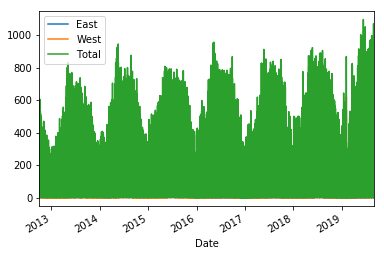

In [6]:
data.plot()

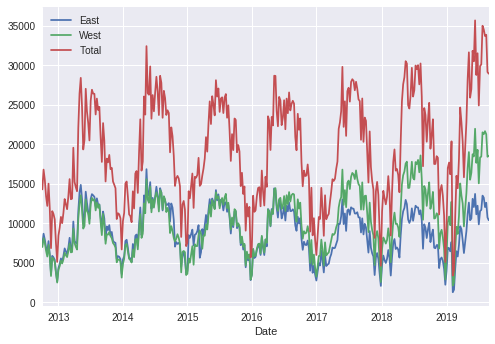

In [7]:
plt.style.use('seaborn')
data.resample('W').sum().plot()

(0, 1163374.15)

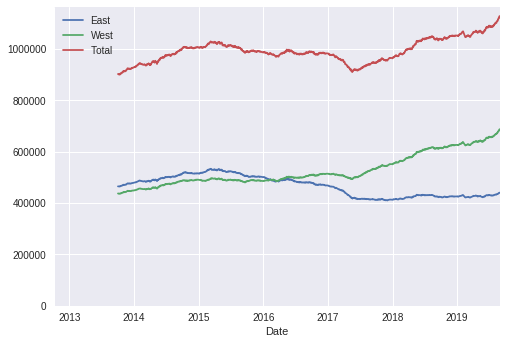

In [8]:
ax=data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

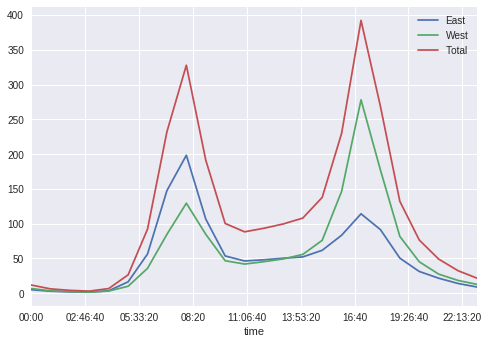

In [9]:
data.groupby(data.index.time).mean().plot();

In [10]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


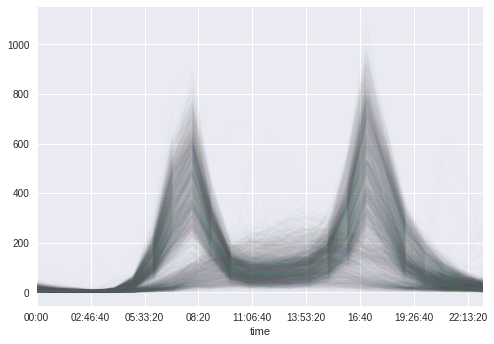

In [11]:
pivoted.plot(legend=False,alpha=0.01);